In [1]:
# !pip install transformers==4.41.2

In [ ]:
import json
import pandas as pd
import seaborn as sns
import tiktoken

default_model = "gpt-4"
encoding = tiktoken.encoding_for_model(default_model)

/home/congyu/tree-of-thought-llm/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [3]:
with open('/home/congyu/tree-of-thought-llm/logs/old_text/gpt-4_1.0_generate_sample_select_greedy_sample5_start0_end100.json', 'r') as f:
    data = json.load(f)

In [ ]:
# path_idx: 0-4
path_idx = 2
# step_idx: 0-1
step_idx = 0
new_ys = data[path_idx]["steps"][step_idx]["new_ys"]

In [29]:
def get_length_and_num_tokens(inp):
    idx, text = inp
    return {'child_id': str(idx), 'text_length': len(text), 'num_tokens': len(encoding.encode(text))}

text_lengths = list(map(get_length_and_num_tokens, enumerate(new_ys)))

In [30]:
df = pd.DataFrame(text_lengths)

In [31]:
df

,child_id,text_length,num_tokens
0,0,348,68
1,1,298,65
2,2,308,68
3,3,368,77
4,4,339,70


In [32]:
df = df.melt(id_vars='child_id', var_name="length_type")

In [33]:
sns.set_theme(style="whitegrid")

In [34]:
import matplotlib.pyplot as plt

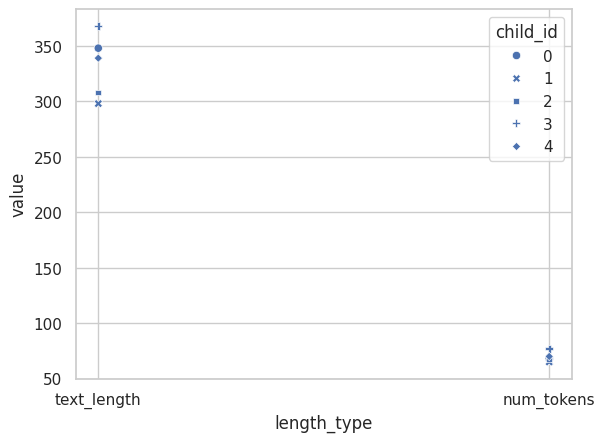

In [35]:
ax = sns.scatterplot(df, style='child_id', y='value', x='length_type')
sns.move_legend(ax, loc='upper right')

In [26]:
new_ys[1]

"Plan:\n1. Introduce the idea of overcoming fears and trying something new through handstands.\n2. Discuss an unexpected experience during an astronaut's spacewalk, relating it to the first paragraph's theme of embracing the new and unexpected.\n3. Describe a humorous situation in a social setting, showing how the woman embraces her uniqueness and deals with unwanted situations.\n4. Reflect on the idea that everyone's perception of an individual is different and that it's essential to be true to oneself.\n"

In [27]:
new_ys[0]

'Plan:\n1. Introduce a character named Sarah, who is learning acrobatics.\n2. Make her meet someone new at her classes, discuss their passion for acrobatics, and bond over their shared interests.\n3. One day, Sarah meets this new friend at a bar, and someone tries to pick her up, leading to her using sign language to express her disinterest.\n4. End with the idea that different people perceive us differently on the basis of our actions and words.\n'